# tfields
## Tensors, Tensor Fields, Mesh Manipulation and More
### A Library by Daniel Böckenhoff

# Overview

## Installation

### Pypi:

```bash
pip install tfields
```

### Git:
```bash
git clone https://gitlab.mpcdf.mpg.de/dboe/tfields.git
```

## Standards

python > 2.7

Tested on Linux / Windows / Mac

Unit tested with **~ 80 % coverage**

# Introduction

## Base Objects: Tensors of any dimension

In [1]:
import tfields

In [2]:
scalars = tfields.Tensors([0, 1, 2.])
scalars.rank, scalars.dim

(0, 1)

In [3]:
vectors = tfields.Tensors([[0, 0, 0],
                           [0, 0, 1],
                           [0, -1, 0.]])
vectors.rank, vectors.dim

(1, 3)

In [4]:
# Levi-Zivita Tensor
matrices = tfields.Tensors([[[0, 0, 0], [0, 0, 1], [0, -1, 0]],
                            [[0, 0, -1], [0, 0, 0], [1, 0, 0]],
                            [[0, 1, 0], [-1, 0, 0], [0, 0, 0]]])
matrices.rank, matrices.dim

(2, 3)

# Symbolic Coordinate System and Transformation

## Coordinate System as attribute

In [5]:
vectors.coord_sys  # Default

'cartesian'

In [6]:
vectors_cylinder = tfields.Tensors([[1, 1, 1]], coord_sys='cylinder')  # Initialization with different base
vectors_cylinder.coord_sys

'cylinder'

## Transformations

### Bijective Transformations @ Singularities

In [7]:
orig = vectors.copy()
vectors.transform('spherical')
vectors.transform('cylinder')
vectors.transform('cartesian')
vectors.equal(orig, atol=1e-15)

True

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Tensor Fields

In [9]:
scalar_field = tfields.TensorFields(vectors, scalars)

<IPython.core.display.Javascript object>


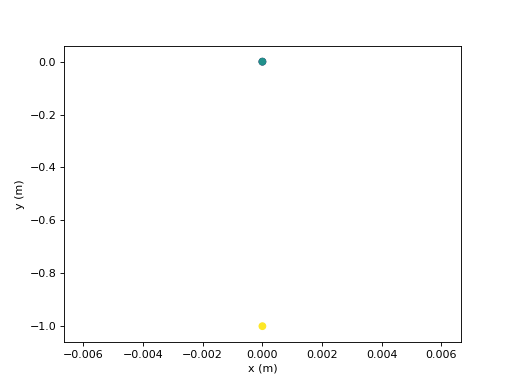

In [23]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

artist = scalar_field.plot(axis=ax, field_index=0)

Slicing, Indexing and Comparison e.g.

In [11]:
vectors.equal(scalar_field)

True

In [12]:
scalar_field[:2].fields[0]

Tensors([ 0.,  1.])

# Tensor Maps (Graph Theory)

Tensors considered as Nodes → Maps define Connections

In [13]:
maps = [tfields.TensorFields([[0, 1, 2]], fields=[[42]])]  # very simple map that connects the first three nodes
graph = tfields.TensorMaps(scalar_field, maps=maps)

This is the special case of a **3D CAD mesh**

<IPython.core.display.Javascript object>


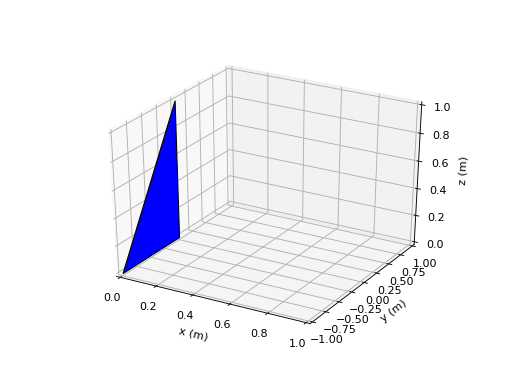

In [24]:
mesh = tfields.Mesh3D(scalar_field, maps=maps)

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
artist = mesh.plot(axis=ax, color='b', edgecolor='k')

# Glimpses

## Indexing

<IPython.core.display.Javascript object>


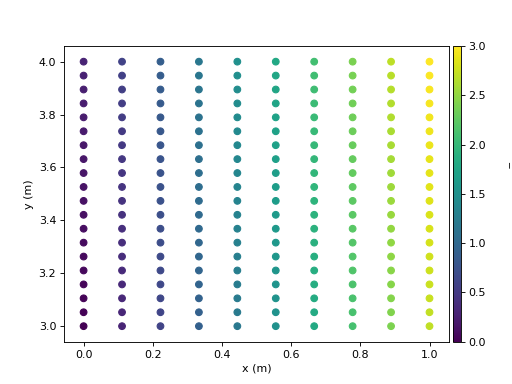

In [25]:
gradient = tfields.TensorFields.grid((0, 1, 10), (3, 4, 20))
gradient.fields.append(tfields.Tensors.grid((0, 3, 200)))

%matplotlib notebook
artist = gradient.plot(field_index=0, vmin=-0.1, vmax=3.1, cmap='plasma')
axes = tfields.plotting.gca(2)
cbar=tfields.plotting.set_colorbar(axes, artist)

<IPython.core.display.Javascript object>


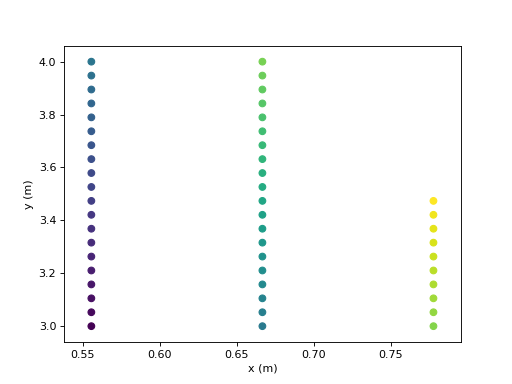

In [26]:
%matplotlib notebook
artist = gradient[100:150].plot(field_index=0, vmin=-0.1, vmax=3.1, cmap='plasma')

## Curl Vector Field

In [17]:
basis_vectors = tfields.Tensors.grid((0.5, 1, 3),  # R linspace
                                     (-np.pi, np.pi, 11),  # Phi linspace
                                     (-1, 1, 1),  # Z linspace
                                     coord_sys='cylinder')
field_vectors = basis_vectors.copy(); field_vectors[:, 1] += np.pi / 2
whirl = tfields.TensorFields(basis_vectors, field_vectors, coord_sys='cartesian')  # TODO

%matplotlib notebook
artist = whirl.plot(axis=ax, field_index=0)

## Approximated sphere translated in y

<IPython.core.display.Javascript object>


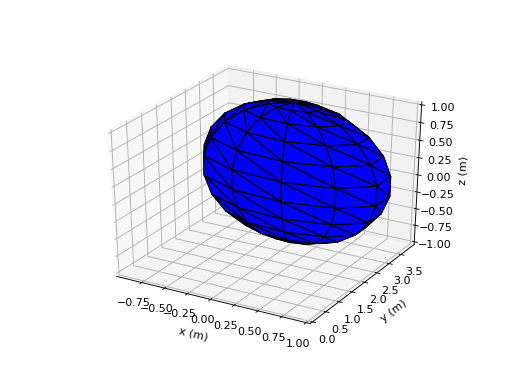

In [27]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

sphere = tfields.Mesh3D.grid((1, 1, 1),
                             (-np.pi, np.pi, 12),
                             (-np.pi / 2, np.pi / 2, 12),
                             coord_sys='spherical')
sphere.transform('cartesian')
sphere[:, 1] += 3
artist = sphere.plot(axis=ax,
                     color='b',
                     edgecolor='k')

## Oktaeder

<IPython.core.display.Javascript object>


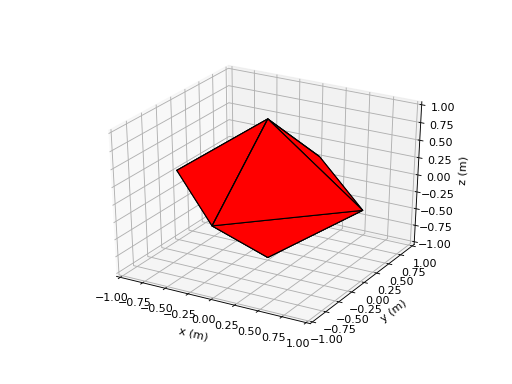

In [28]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

oktaeder = tfields.Mesh3D.grid((1, 1, 1),
                               (-np.pi, np.pi, 5),
                               (-np.pi / 2, np.pi / 2, 3),
                               coord_sys='spherical')
oktaeder.transform('cartesian')
artist = oktaeder.plot(axis=ax,
                       color='r',
                       edgecolor='k')

# Merging

<IPython.core.display.Javascript object>


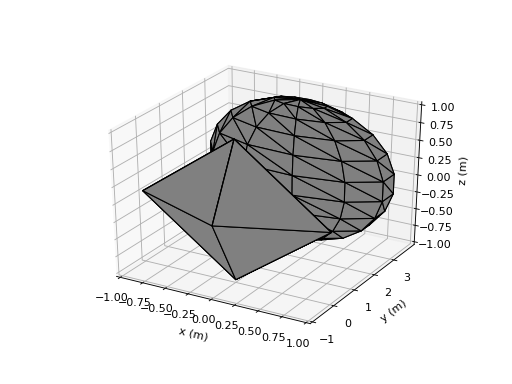

In [29]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

complex = tfields.Mesh3D.merged(sphere, oktaeder)
artist = complex.plot(axis=ax, edgecolor='k')

# Splitting using fast algorithms from Graph Theory (Disjoint Nodes)

In [21]:
map_description = complex.disjoint_map(0)
parts = complex.parts(map_description)
parts[0].equal(sphere), parts[1].equal(oktaeder)

(True, True)

# Cutting using Symbolic Maths

<IPython.core.display.Javascript object>


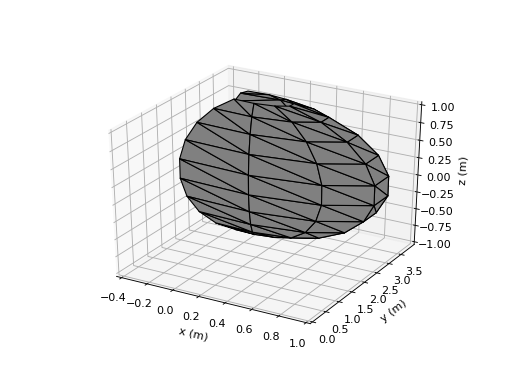

In [22]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
tfields.plotting.set_aspect_equal(ax)

import sympy
import tfields
x, y, z = sympy.symbols('x y z')
halfed = sphere.cut(x > 0, at_intersection='keep')
artist = halfed.plot(axis=ax, edgecolor='k')

# Templates
Such cuts or disjonts can be used as templates with decision trees -> Huge speedup